In [21]:
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [22]:
data_path = './Data_Ankle.mat'
data_mat = loadmat(data_path)

In [23]:
data_matrix = data_mat['ankle_data']
data_matrix.shape

(48000, 6)

In [24]:
columns = ['Time', 'Vertical Ground_Reaction_Force', 'Hip_Angle', 'Knee_Angle', 'Ankle_Angle', 'Ankle_Moment']
data_df = pd.DataFrame(data_matrix, columns=columns)
missing_values = data_df.isnull().sum()
data_df.head(), missing_values

(   Time  Vertical Ground_Reaction_Force  Hip_Angle  Knee_Angle  Ankle_Angle  \
 0  0.00                       10.748116   0.292974    0.825063    -1.492588   
 1  0.01                        8.231421   0.293179    0.822469    -1.493192   
 2  0.02                        6.204634   0.294008    0.810997    -1.495867   
 3  0.03                        5.083716   0.295568    0.785731    -1.501793   
 4  0.04                        4.816681   0.297472    0.745707    -1.511208   
 
    Ankle_Moment  
 0     -1.926491  
 1     -1.984065  
 2     -1.921029  
 3     -1.727272  
 4     -1.440258  ,
 Time                              0
 Vertical Ground_Reaction_Force    0
 Hip_Angle                         0
 Knee_Angle                        0
 Ankle_Angle                       0
 Ankle_Moment                      0
 dtype: int64)

In [25]:
data_to_scale = data_df.drop(columns=['Time'])

In [26]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

In [27]:
scaled_df = pd.DataFrame(scaled_data, columns=columns[1:])
scaled_df['Time'] = data_df['Time']

In [28]:
train_size = int(0.8 * len(scaled_df))
train_data = scaled_df[:train_size]
test_data = scaled_df[train_size:]

In [29]:
train_data

,Vertical Ground_Reaction_Force,Hip_Angle,Knee_Angle,Ankle_Angle,Ankle_Moment,Time
0,1.164420,1.165376,1.118800,0.427622,-0.904122,0.00
1,1.156401,1.166540,1.110820,0.423625,-0.905688,0.01
2,1.149944,1.171241,1.075539,0.405926,-0.903974,0.02
3,1.146372,1.180092,0.997836,0.366702,-0.898705,0.03
4,1.145522,1.190897,0.874748,0.304399,-0.890899,0.04
...,...,...,...,...,...,...
38395,0.745858,-1.235113,0.651326,0.736567,-0.351978,383.95
38396,0.895353,-1.105113,0.839931,1.080455,-0.569171,383.96
38397,1.008179,-0.957517,1.032696,1.384518,-0.730013,383.97
38398,1.087433,-0.796470,1.223985,1.627290,-0.837842,383.98


In [30]:
X_train_1 = train_data[['Ankle_Angle', 'Knee_Angle', 'Hip_Angle']].values
y_train_1 = train_data['Ankle_Moment'].values

X_test_1 = test_data[['Ankle_Angle','Knee_Angle', 'Hip_Angle']].values
y_test_1 = test_data['Ankle_Moment'].values

In [31]:
X_train_1_cnn = X_train_1.reshape(X_train_1.shape[0], X_train_1.shape[1], 1)
X_test_1_cnn = X_test_1.reshape(X_test_1.shape[0], X_test_1.shape[1], 1)

X_train_1_cnn.shape, X_test_1_cnn.shape, y_train_1.shape, y_test_1.shape

((38400, 3, 1), (9600, 3, 1), (38400,), (9600,))

In [32]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
model = Sequential()
model.add(Conv1D(16, kernel_size=(1,), activation="relu", input_shape=(3,1)))
#model.add(Conv2D(32, kernel_size=(2,), activation="relu"))
model.add(Flatten())
model.compile(loss="mse", optimizer="adam")
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="linear"))

In [35]:
fit = model.fit(X_train_1_cnn, y_train_1, batch_size=12, validation_split=0.2,epochs=50)

Epoch 1/50
2560/2560 [==============================] - 283s 110ms/step - loss: 0.0159 - val_loss: 0.0176
Epoch 2/50
2560/2560 [==============================] - 296s 116ms/step - loss: 0.0159 - val_loss: 0.0166
Epoch 3/50
2560/2560 [==============================] - 299s 117ms/step - loss: 0.0159 - val_loss: 0.0170
Epoch 4/50
2560/2560 [==============================] - 305s 119ms/step - loss: 0.0159 - val_loss: 0.0169
Epoch 5/50
2560/2560 [==============================] - 305s 119ms/step - loss: 0.0158 - val_loss: 0.0172
Epoch 6/50
2560/2560 [==============================] - 318s 124ms/step - loss: 0.0159 - val_loss: 0.0189
Epoch 7/50
2560/2560 [==============================] - 309s 121ms/step - loss: 0.0159 - val_loss: 0.0176
Epoch 8/50
2560/2560 [==============================] - 302s 118ms/step - loss: 0.0159 - val_loss: 0.0165
Epoch 9/50
2560/2560 [==============================] - 301s 117ms/step - loss: 0.0159 - val_loss: 0.0177
Epoch 10/50
2560/2560 [=======================

In [38]:
ypred = model.predict(X_test_1_cnn)

300/300 [==============================] - 0s 1ms/step


In [51]:
loss = model.evaluate(X_test_1_cnn, y_test_1)
print("Test loss for combination 1:", loss)

300/300 [==============================] - 1s 1ms/step - loss: 0.0169
Test loss for combination 1: 0.016872093081474304


In [40]:
from sklearn.metrics import r2_score
r2_score(y_test_1, ypred)

0.9832548797815232

In [40]:
def extract_data_for_combination(columns):
    X_train = train_data[columns].values
    y_train = train_data['Ankle_Moment'].values
    X_test = test_data[columns].values
    y_test = test_data['Ankle_Moment'].values
    # Reshape for RNN
    X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

    return X_train_rnn, y_train, X_test_rnn, y_test

In [41]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.layers import LSTM

def create_rnn_model_for_combination(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [42]:
X_train_rnn, y_train, X_test_rnn, y_test = extract_data_for_combination(['Ankle_Angle', 'Knee_Angle', 'Hip_Angle'])
rnn_model = create_rnn_model_for_combination(input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]))
rnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10800     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,851
Trainable params: 10,851
Non-trainable params: 0
_________________________________________________________________


In [43]:
model = rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/50
480/480 [==============================] - 3s 3ms/step - loss: 0.2216 - val_loss: 0.0501
Epoch 2/50
480/480 [==============================] - 1s 2ms/step - loss: 0.0575 - val_loss: 0.0434
Epoch 3/50
480/480 [==============================] - 1s 2ms/step - loss: 0.0510 - val_loss: 0.0377
Epoch 4/50
480/480 [==============================] - 1s 2ms/step - loss: 0.0466 - val_loss: 0.0346
Epoch 5/50
480/480 [==============================] - 1s 2ms/step - loss: 0.0437 - val_loss: 0.0321
Epoch 6/50
480/480 [==============================] - 1s 2ms/step - loss: 0.0412 - val_loss: 0.0290
Epoch 7/50
480/480 [==============================] - 1s 2ms/step - loss: 0.0392 - val_loss: 0.0273
Epoch 8/50
480/480 [==============================] - 1s 2ms/step - loss: 0.0386 - val_loss: 0.0276
Epoch 9/50
480/480 [==============================] - 1s 2ms/step - loss: 0.0375 - val_loss: 0.0261
Epoch 10/50
480/480 [==============================] - 1s 2ms/step - loss: 0.0368 - val_loss: 0.0248

In [46]:
loss = rnn_model.evaluate(X_test_rnn, y_test)
print("Test loss for combination 1:", loss)

300/300 [==============================] - 1s 2ms/step - loss: 0.0188
Test loss for combination 1: 0.018795005977153778


In [50]:
predicted = rnn_model.predict(y_test)

ValueError: in user code:

    File "C:\Users\49160\anaconda3\envs\neuralnetwork\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\49160\anaconda3\envs\neuralnetwork\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\49160\anaconda3\envs\neuralnetwork\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\49160\anaconda3\envs\neuralnetwork\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\49160\anaconda3\envs\neuralnetwork\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\49160\anaconda3\envs\neuralnetwork\lib\site-packages\keras\engine\input_spec.py", line 214, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_3" (type Sequential).
    
    Input 0 of layer "lstm_1" is incompatible with the layer: expected ndim=3, found ndim=1. Full shape received: (32,)
    
    Call arguments received by layer "sequential_3" (type Sequential):
      • inputs=tf.Tensor(shape=(32,), dtype=float32)
      • training=False
      • mask=None


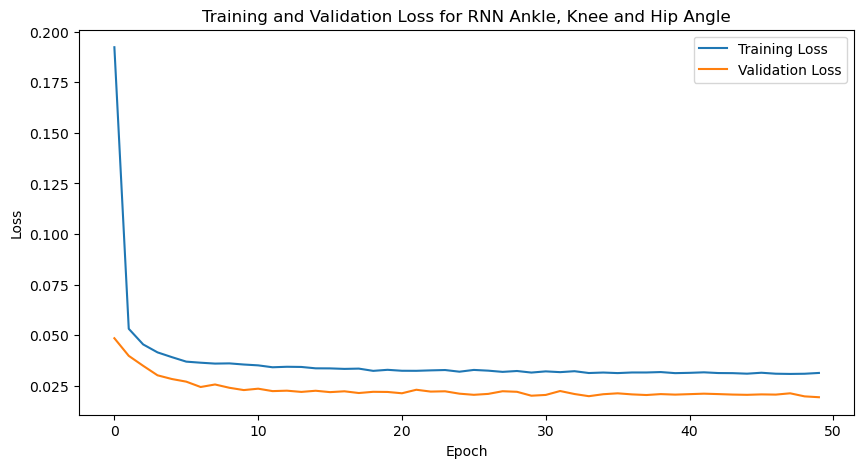

In [16]:
train_loss = model.history['loss']
val_loss = model.history['val_loss']

# Plotting training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss for RNN Ankle, Knee and Hip Angle')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

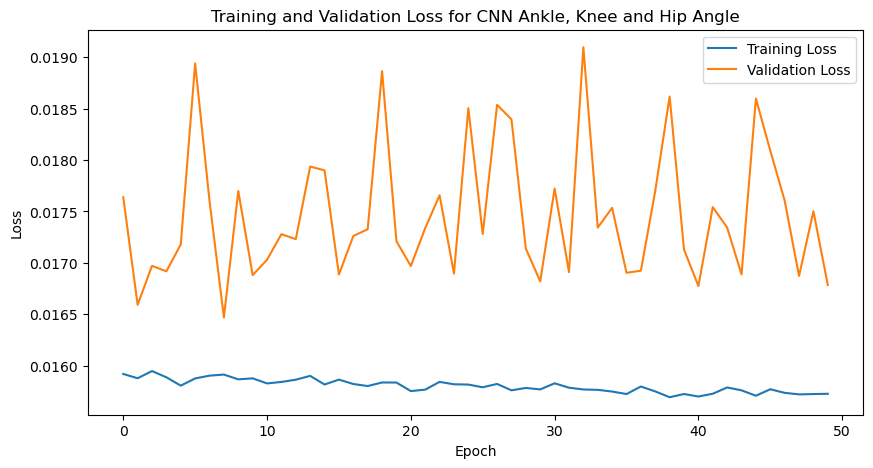

In [37]:
train_loss = fit.history['loss']
val_loss = fit.history['val_loss']

# Plotting training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss for CNN Ankle, Knee and Hip Angle')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

NameError: name 'y_pred' is not defined

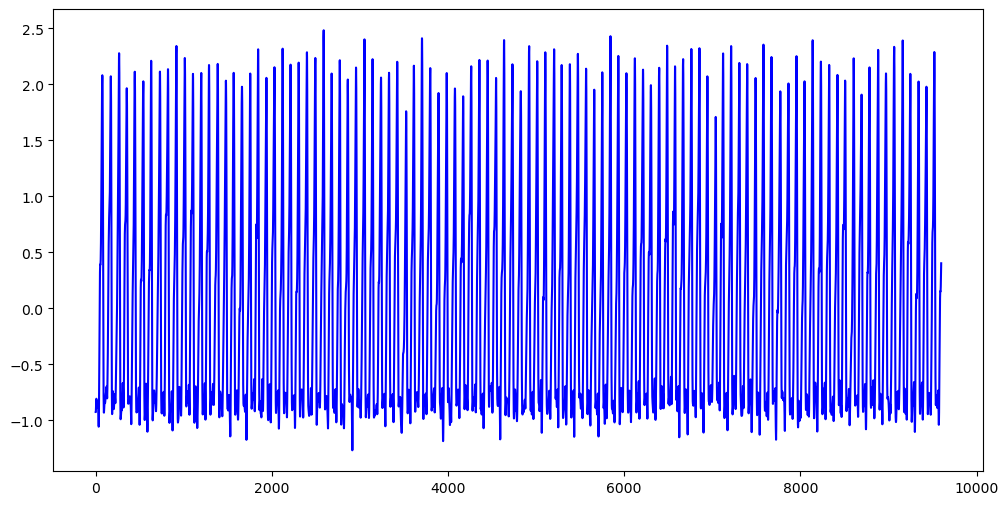

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_1, label="Actual Values", color='blue')
plt.plot(y_pred, label="Predicted Values", color='red', linestyle='dashed')
plt.legend()
plt.title("Actual vs. Predicted Values")
plt.xlabel("Time Points")
plt.ylabel("Ankle Joint Moment")
plt.grid(True)
plt.show()